# Goal

* Analyze results from `atomIncorp_fracSize` simulation

# Var

In [39]:
workDir = '/ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize/'

# Init

In [40]:
library(dplyr)
library(tidyr)
library(ggplot2)

as.Num = function(x) x %>% as.character %>% as.numeric

# Plotting fraction sizes

## Load

In [41]:
# files on simulation accuracy
files = list.files(path=workDir, pattern='fracs.txt', full.names=TRUE, recursive=TRUE)
files %>% length

[1] 240

In [42]:
df_fracs = list()
for (f in files){
    ff = strsplit(f, '/') %>% unlist
    df = read.delim(f, sep='\t')
    df$rep = ff[length(ff)-1]
    df$frac_mu = ff[length(ff)-2]
    df$atomIncorp = ff[length(ff)-3]
    df_fracs[[f]] = df
}

df_fracs = do.call(rbind, df_fracs)
rownames(df_fracs) = 1:nrow(df_fracs)

# status
df_fracs %>% dim %>% print
df_fracs %>% head(n=3)

[1] 31831     8


,library,fraction,BD_min,BD_max,fraction_size,rep,frac_mu,atomIncorp
1,1,1,1.673,1.676,0.003,1,0.003,0
2,1,2,1.676,1.678,0.002,1,0.003,0
3,1,3,1.678,1.679,0.001,1,0.003,0


## Fraction sizes

In [43]:
## min G+C cutoff
min_GC = 13.5
## max G+C cutoff
max_GC = 80
## max G+C shift
max_13C_shift_in_BD = 0.036


min_BD = min_GC/100.0 * 0.098 + 1.66    
max_BD = max_GC/100.0 * 0.098 + 1.66    

max_BD = max_BD + max_13C_shift_in_BD

cat('Min BD:', min_BD, '\n')
cat('Max BD:', max_BD, '\n')

Min BD: 1.67323 
Max BD: 1.7744 


In [44]:
# filtering to just within min-max BD
df_fracs %>% nrow %>% print
df_fracs = df_fracs %>%
    filter(BD_min >= min_BD,
           BD_max <= max_BD)
df_fracs %>% nrow %>% print

[1] 31831
[1] 30391


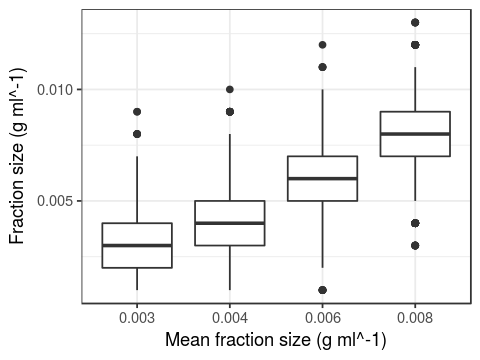

In [58]:
# plotting
options(repr.plot.width=4, repr.plot.height=3)
p_size = ggplot(df_fracs, aes(frac_mu, fraction_size)) +
    geom_boxplot() +
    labs(x='Mean fraction size (g ml^-1)', y='Fraction size (g ml^-1)') +
    theme_bw() 
plot(p_size)

## Number of fractions per gradient

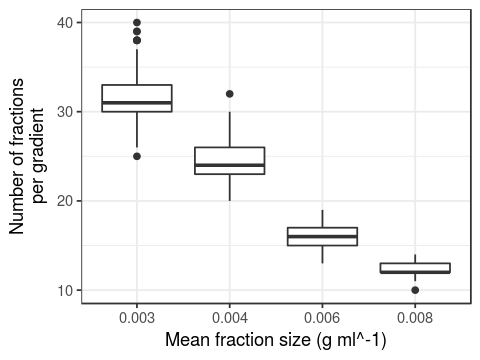

In [59]:
df_fracs_s = df_fracs %>%
    mutate(frac_mu = frac_mu %>% as.character) %>%
    group_by(library, rep, frac_mu, atomIncorp) %>%
    summarize(n_fracs = fraction %>% unique %>% length) %>%
    ungroup() %>%
    mutate(frac_mu = frac_mu %>% as.character) 

# plotting
options(repr.plot.width=4, repr.plot.height=3)
p_fracs = ggplot(df_fracs_s, aes(frac_mu, n_fracs)) +
    geom_boxplot() +
    labs(x='Mean fraction size (g ml^-1)', y='Number of fractions\nper gradient') +
    theme_bw() 
plot(p_fracs)

### Combined plot

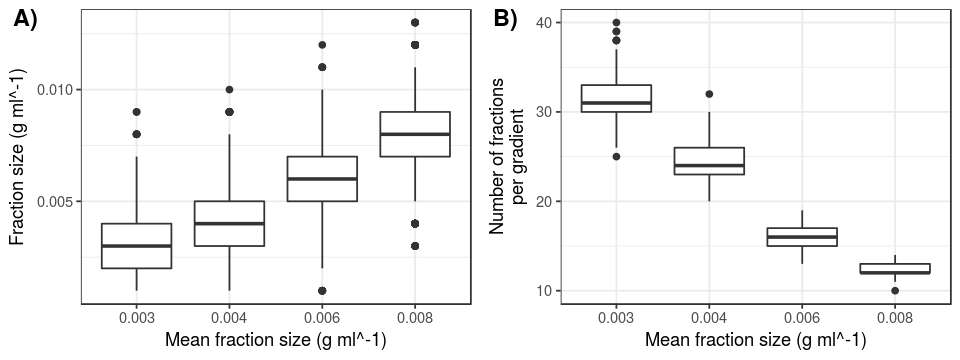

In [72]:
options(repr.plot.width=8, repr.plot.height=3)
p_size_fracs = cowplot::plot_grid(p_size, p_fracs, labels = c("A)", "B)"))
plot(p_size_fracs)

In [73]:
outF = file.path(workDir, 'atomIncorp_fracSize_nFracs.pdf')
ggsave(outF, p_size_fracs, width=8, height=3)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//atomIncorp_fracSize_nFracs.pdf 


In [74]:
outF = file.path(workDir, 'atomIncorp_fracSize_nFracs.jpeg')
ggsave(outF, p_size_fracs, width=8, height=3)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//atomIncorp_fracSize_nFracs.jpeg 


# Load

In [63]:
# files on simulation accuracy
files = list.files(path=workDir, pattern='*-cMtx_byClass.txt', full.names=TRUE)
files

[1] "/ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//DESeq2_multi-cMtx_byClass.txt"
[2] "/ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//DESeq2-cMtx_byClass.txt"      
[3] "/ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//heavy-cMtx_byClass.txt"       
[4] "/ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//qSIP-cMtx_byClass.txt"

In [64]:
# combining files
df_byClass = list()
for (f in files){
    ff = strsplit(f, '/') %>% unlist
    fff = ff[length(ff)]
    df_byClass[[fff]] = read.delim(f, sep='\t')
}

df_byClass = do.call(rbind, df_byClass)
df_byClass$file = gsub('\\.[0-9]+$', '', rownames(df_byClass))
df_byClass$method = gsub('-.+', '', df_byClass$file)
rownames(df_byClass) = 1:nrow(df_byClass)

df_byClass %>% head(n=3)

,library,variables,values,percIncorp,frac_mu,rep,file,method
1,2,Sensitivity,NA,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,DESeq2_multi
2,2,Specificity,0.99908592321755,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,DESeq2_multi
3,2,Pos Pred Value,NA,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,DESeq2_multi


In [65]:
# renaming methods
rename = data.frame(method = c('DESeq2', 'DESeq2_multi', 'heavy', 'qSIP'), 
                   method_new = c('HR-SIP', 'MW-HR-SIP', 'Heavy-SIP', 'q-SIP'))

df_byClass = inner_join(df_byClass, rename, c('method'='method')) %>%
    select(-method) %>%
    rename('method' = method_new) 

df_byClass %>% dim %>% print
df_byClass %>% head(n=3)

Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining character vector and factor, coercing into character vector”

[1] 23040     8


,library,variables,values,percIncorp,frac_mu,rep,file,method
1,2,Sensitivity,NA,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,MW-HR-SIP
2,2,Specificity,0.99908592321755,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,MW-HR-SIP
3,2,Pos Pred Value,NA,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,MW-HR-SIP


In [66]:
# adding number of fractions per gradient
## mean n-fracs
df_fracs_s = df_fracs %>%
    mutate(frac_mu = frac_mu %>% as.character) %>%
    group_by(library, rep, frac_mu, atomIncorp) %>%
    summarize(n_fracs = fraction %>% unique %>% length) %>%
    group_by(frac_mu) %>%
    summarize(n_fracs = mean(n_fracs)) %>%
    ungroup() %>%
    mutate(frac_mu = frac_mu %>% as.character) 

## joining
df_byClass = df_byClass %>%
    inner_join(df_fracs_s %>% 
                   dplyr::select(frac_mu, n_fracs) %>%
                   mutate(frac_mu = frac_mu %>% as.Num),
               c('frac_mu' = 'frac_mu'))

df_byClass %>% dim %>% print
df_byClass %>% head(n=3)

[1] 23040     9


,library,variables,values,percIncorp,frac_mu,rep,file,method,n_fracs
1,2,Sensitivity,NA,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,MW-HR-SIP,31.4638888888889
2,2,Specificity,0.99908592321755,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,MW-HR-SIP,31.4638888888889
3,2,Pos Pred Value,NA,0,0.003,1,DESeq2_multi-cMtx_byClass.txt,MW-HR-SIP,31.4638888888889


Warning message:
“Removed 64 rows containing missing values (geom_pointrange).”

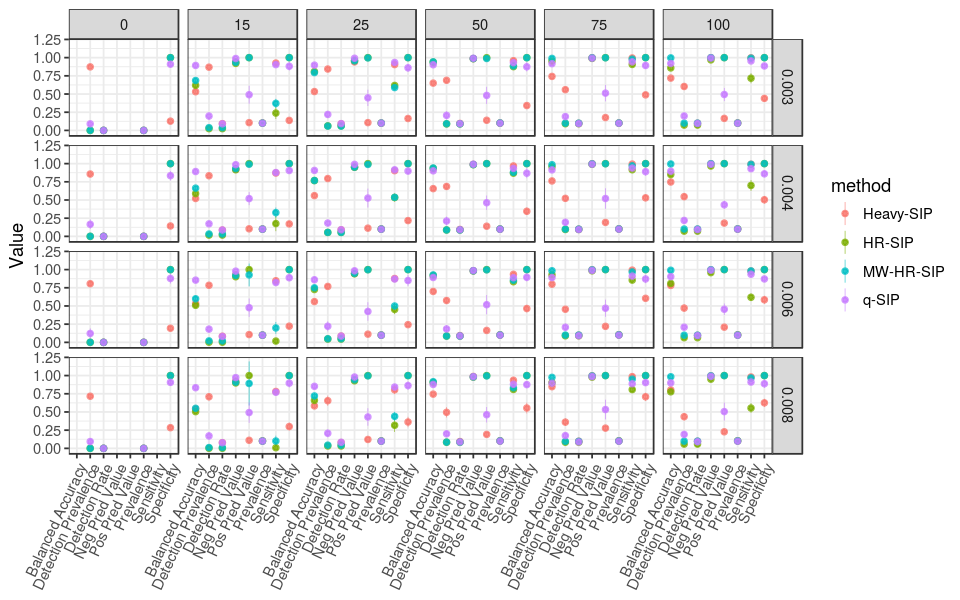

In [67]:
# summarize by SIPSim rep & library rep
df_byClass.s = df_byClass %>%
    group_by(method, percIncorp, frac_mu, n_fracs, variables) %>%
    summarize(mean_value = mean(values, na.rm=TRUE),
              sd_value = sd(values, na.rm=TRUE))

# plotting
options(repr.plot.width=8, repr.plot.height=5)
p = ggplot(df_byClass.s, aes(variables, mean_value, color=method,
                         ymin=mean_value-sd_value,
                         ymax=mean_value+sd_value)) +
    geom_pointrange(alpha=0.8, size=0.2) +
    labs(y='Value') +
    facet_grid(frac_mu ~ percIncorp) +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=65, hjust=1)
    )
plot(p)

Warning message:
“Removed 32 rows containing missing values (geom_point).”Warning message:
“Removed 32 rows containing missing values (geom_linerange).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

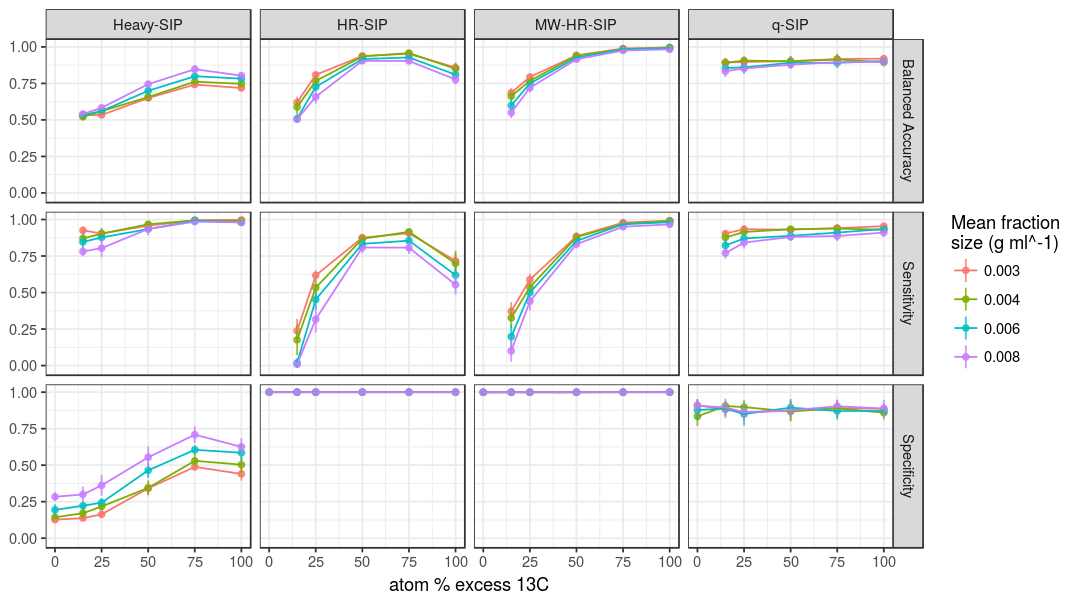

In [68]:
# summarize by SIPSim rep & library rep
vars = c('Balanced Accuracy', 'Sensitivity', 'Specificity')
df_byClass.s.f = df_byClass.s %>%
    filter(variables %in% vars) %>%
    ungroup() %>%
    mutate(frac_mu = frac_mu %>% as.character,
           frac_mu = frac_mu %>% reorder(frac_mu %>% as.Num),
           n_fracs = round(n_fracs, 0) %>% as.character)


# plotting
options(repr.plot.width=9, repr.plot.height=5)
p.pnt1 = ggplot(df_byClass.s.f, aes(percIncorp, mean_value, 
                           color=frac_mu, 
                           group=frac_mu,
                           ymin=mean_value-sd_value,
                           ymax=mean_value+sd_value)) +
    geom_point(alpha=0.8) +
    geom_linerange(alpha=0.8, size=0.5) +
    geom_line() +
    scale_color_discrete('Mean fraction\nsize (g ml^-1)') +
    labs(x='atom % excess 13C') +
    facet_grid(variables ~ method) +
    theme_bw() +
    theme(
        axis.title.y = element_blank()
    )
plot(p.pnt1)

Warning message:
“Removed 32 rows containing missing values (geom_point).”Warning message:
“Removed 32 rows containing missing values (geom_linerange).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

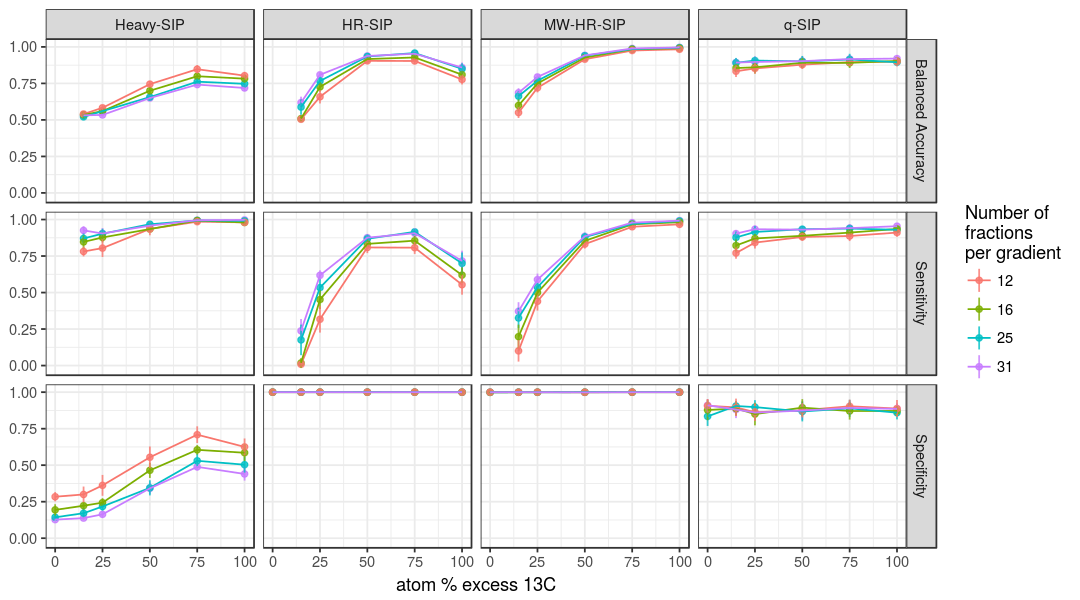

In [69]:
# summarize by SIPSim rep & library rep
vars = c('Balanced Accuracy', 'Sensitivity', 'Specificity')
df_byClass.s.f = df_byClass.s %>%
    filter(variables %in% vars) %>%
    ungroup() %>%
    mutate(frac_mu = frac_mu %>% as.character,
           frac_mu = frac_mu %>% reorder(frac_mu %>% as.Num),
           n_fracs = round(n_fracs, 0) %>% as.character,
           n_fracs = n_fracs %>% reorder(n_fracs %>% as.Num))


# plotting
options(repr.plot.width=9, repr.plot.height=5)
p.pnt2 = ggplot(df_byClass.s.f, aes(percIncorp, mean_value, 
                           color=n_fracs, 
                           group=n_fracs,
                           ymin=mean_value-sd_value,
                           ymax=mean_value+sd_value)) +
    geom_point(alpha=0.8) +
    geom_linerange(alpha=0.8, size=0.5) +
    geom_line() +
    scale_color_discrete('Number of\nfractions\nper gradient') +
    labs(x='atom % excess 13C') +
    facet_grid(variables ~ method) +
    theme_bw() +
    theme(
        axis.title.y = element_blank()
    )
plot(p.pnt2)

In [70]:
outF = file.path(workDir, 'atomIncorp_fracSize_acc.pdf')
ggsave(outF, p.pnt1, width=10, height=6)
cat('File written:', outF, '\n')

Warning message:
“Removed 32 rows containing missing values (geom_point).”Warning message:
“Removed 32 rows containing missing values (geom_linerange).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//atomIncorp_fracSize_acc.pdf 


In [71]:
outF = file.path(workDir, 'atomIncorp_fracSize_acc.jpeg')
ggsave(outF, p.pnt1, width=10, height=6)
cat('File written:', outF, '\n')

Warning message:
“Removed 32 rows containing missing values (geom_point).”Warning message:
“Removed 32 rows containing missing values (geom_linerange).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//atomIncorp_fracSize_acc.jpeg 


# BD shift quantify

## True BD shift

In [18]:
BDshift_files = list.files(path=workDir, pattern='BD-shift_stats.txt', full.names=TRUE, recursive=TRUE)
BDshift_files %>% length %>% print

[1] 240


In [19]:
df_shift = list()
for(F in BDshift_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$percIncorp = FF[FFl-3]
    tmp$frac_mu = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_shift[[F]] = tmp
}

df_shift = do.call(rbind, df_shift)
rownames(df_shift) = 1:nrow(df_shift)

df_shift = df_shift %>%
    filter(library %in% c(2,4,6)) %>%
    group_by(taxon, percIncorp, frac_mu, rep) %>%
    summarize(median = median(median)) %>%
    ungroup() %>%
    rename('median_true_BD_shift' = median) 

# status
df_shift %>% nrow %>% print
df_shift %>% head(n=3)

[1] 264480


,taxon,percIncorp,frac_mu,rep,median_true_BD_shift
1,Acaryochloris_marina_MBIC11017,0,0.003,1,1.68753899743e-14
2,Acaryochloris_marina_MBIC11017,0,0.003,10,0
3,Acaryochloris_marina_MBIC11017,0,0.003,2,0


## MW-HR-SIP incorp calls

* filtering BD shift estimates to just incorporators identified by MW-HR-SIP

In [20]:
incorp_files = list.files(path=workDir, pattern='OTU_abs1e9_PCR_sub_filt_MW_DESeq2_incorp.txt', full.names=TRUE, recursive=TRUE)
incorp_files %>% length %>% print

[1] 240


In [21]:
df_incorp = list()
for(F in incorp_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$percIncorp = FF[FFl-3]
    tmp$frac_mu = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_incorp[[F]] = tmp
}

df_incorp = do.call(rbind, df_incorp)
rownames(df_incorp) = 1:nrow(df_incorp)
df_incorp %>% head(n=3) %>% print

     baseMean log2FoldChange      lfcSE      stat    pvalue      padj         p
1  1.01763669     0.03324132 0.18511494 0.1795712 0.8574892 0.9999985 0.8791888
2  0.03647256     0.01116430 0.05991726 0.1863286 0.8521871 0.9999985 0.9999664
3 11.69057411     0.13086554 0.19979375 0.6550031 0.5124657 0.9999985 0.7245083
  occur_all occur_heavy heavy_BD_min heavy_BD_max
1         0           0          1.7         1.73
2         0           0          1.7         1.73
3         0           0          1.7         1.73
                           taxon incorp percIncorp frac_mu rep
1 Acaryochloris_marina_MBIC11017  FALSE          0   0.003   1
2       Acholeplasma_palmae_J233  FALSE          0   0.003   1
3      Acidiphilium_cryptum_JF-5  FALSE          0   0.003   1
                                          file
1 OTU_abs1e9_PCR_sub_filt_MW_DESeq2_incorp.txt
2 OTU_abs1e9_PCR_sub_filt_MW_DESeq2_incorp.txt
3 OTU_abs1e9_PCR_sub_filt_MW_DESeq2_incorp.txt


In [22]:
# just incorporators
df_incorp = df_incorp %>%
    filter(incorp == TRUE) %>%
    dplyr::distinct(taxon, incorp, percIncorp, frac_mu, rep) %>%
    rename('HWHRSIP_incorp' = incorp)

df_incorp %>% nrow %>% print
df_incorp %>% head(n=3) %>% print

[1] 15724
                                               taxon HWHRSIP_incorp percIncorp
1                    Bacteroides_helcogenes_P_36-108           TRUE          0
2 Bifidobacterium_kashiwanohense_JCM_15439_DSM_21854           TRUE          0
3                  Emticicia_oligotrophica_DSM_17448           TRUE          0
  frac_mu rep
1   0.003   1
2   0.003  10
3   0.003  10


## q-SIP

In [23]:
atomX_files = list.files(path=workDir, pattern='*_qSIP_atom.txt', full.names=TRUE, recursive=TRUE)
atomX_files %>% length %>% print

[1] 240


In [24]:
df_atomX = list()
for(F in atomX_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$percIncorp = FF[FFl-3]
    tmp$frac_mu = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_atomX[[F]] = tmp
}

df_atomX = do.call(rbind, df_atomX)
rownames(df_atomX) = 1:nrow(df_atomX)
df_atomX %>% head(n=3) %>% print

                                 taxon  control treatment      BD_diff
1       Acaryochloris_marina_MBIC11017 1.708171  1.709842 0.0016714789
2 Acetobacter_pasteurianus_IFO_3283-03 1.711827  1.712034 0.0002076271
3       Acetobacterium_woodii_DSM_1030 1.702658  1.703639 0.0009809804
  control_GC control_MW treatment_max_MW treatment_MW atom_fraction_excess
1  0.7438214   308.0599         317.6635     308.3614          0.031039722
2  0.7876043   308.0817         317.6634     308.1190          0.003856485
3  0.6778097   308.0272         317.6637     308.2047          0.018211621
   atom_CI_low atom_CI_high percIncorp frac_mu rep
1 -0.005267942   0.06404530          0   0.003   1
2 -0.017872885   0.02176435          0   0.003   1
3 -0.011474687   0.04532687          0   0.003   1
                              file
1 OTU_abs1e9_PCR_sub_qSIP_atom.txt
2 OTU_abs1e9_PCR_sub_qSIP_atom.txt
3 OTU_abs1e9_PCR_sub_qSIP_atom.txt


### Joining estimate with true values

In [25]:
# table join
df_atomX %>% nrow %>% print

df.j = left_join(df_atomX, df_shift, c('taxon' = 'taxon',
                                       'percIncorp'='percIncorp',
                                       'frac_mu'='frac_mu',
                                       'rep'='rep')) %>%
   filter(!is.na(BD_diff)) %>%
   mutate(true_incorporator = ifelse(median_true_BD_shift > 0.002, TRUE, FALSE),
          true_atom_fraction_excess = median_true_BD_shift / 0.036,
          atom_fraction_excess = ifelse(is.na(atom_CI_low), 0, atom_fraction_excess))

df.j %>% nrow %>% print
df.j %>% head(n=3) %>% print

[1] 275280


Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”

[1] 259889
                                 taxon  control treatment      BD_diff
1       Acaryochloris_marina_MBIC11017 1.708171  1.709842 0.0016714789
2 Acetobacter_pasteurianus_IFO_3283-03 1.711827  1.712034 0.0002076271
3       Acetobacterium_woodii_DSM_1030 1.702658  1.703639 0.0009809804
  control_GC control_MW treatment_max_MW treatment_MW atom_fraction_excess
1  0.7438214   308.0599         317.6635     308.3614          0.031039722
2  0.7876043   308.0817         317.6634     308.1190          0.003856485
3  0.6778097   308.0272         317.6637     308.2047          0.018211621
   atom_CI_low atom_CI_high percIncorp frac_mu rep
1 -0.005267942   0.06404530          0   0.003   1
2 -0.017872885   0.02176435          0   0.003   1
3 -0.011474687   0.04532687          0   0.003   1
                              file median_true_BD_shift true_incorporator
1 OTU_abs1e9_PCR_sub_qSIP_atom.txt         1.687539e-14             FALSE
2 OTU_abs1e9_PCR_sub_qSIP_atom.txt         0.000000e+

In [26]:
df.j$true_incorporator %>% summary

   Mode   FALSE    TRUE    NA's 
logical  238252   21637       0 

### Joining with MW-HR-SIP

In [27]:
df.j = left_join(df.j, df_incorp, c('taxon' = 'taxon',
                                    'percIncorp'='percIncorp',
                                    'frac_mu'='frac_mu',
                                    'rep'='rep')) %>%
    mutate(HWHRSIP_incorp = ifelse(is.na(HWHRSIP_incorp), FALSE, TRUE))

df.j %>% nrow %>% print
df.j %>% head(n=3) %>% print

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

[1] 259889
                                 taxon  control treatment      BD_diff
1       Acaryochloris_marina_MBIC11017 1.708171  1.709842 0.0016714789
2 Acetobacter_pasteurianus_IFO_3283-03 1.711827  1.712034 0.0002076271
3       Acetobacterium_woodii_DSM_1030 1.702658  1.703639 0.0009809804
  control_GC control_MW treatment_max_MW treatment_MW atom_fraction_excess
1  0.7438214   308.0599         317.6635     308.3614          0.031039722
2  0.7876043   308.0817         317.6634     308.1190          0.003856485
3  0.6778097   308.0272         317.6637     308.2047          0.018211621
   atom_CI_low atom_CI_high percIncorp frac_mu rep
1 -0.005267942   0.06404530          0   0.003   1
2 -0.017872885   0.02176435          0   0.003   1
3 -0.011474687   0.04532687          0   0.003   1
                              file median_true_BD_shift true_incorporator
1 OTU_abs1e9_PCR_sub_qSIP_atom.txt         1.687539e-14             FALSE
2 OTU_abs1e9_PCR_sub_qSIP_atom.txt         0.000000e+

### Plotting results

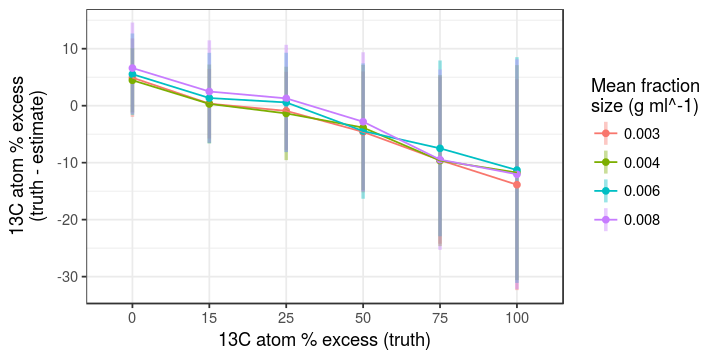

In [28]:
# difference between true and estimated

## q-SIP incorporators 
df.j.dis.qSIP = df.j %>%
    filter(atom_CI_low > 0) %>%     # just incorporators identified by q-SIP
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(percIncorp, frac_mu) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(percIncorp = percIncorp %>% reorder(percIncorp %>% as.numeric),
           frac_mu = frac_mu %>% reorder(frac_mu %>% as.numeric))
   
# plotting
options(repr.plot.width=6, repr.plot.height=3)
p_qSIP = ggplot(df.j.dis.qSIP, aes(percIncorp, mean_delta_excess, 
                      color=frac_mu, group=frac_mu,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    geom_line() +
    #facet_grid(true_incorporator ~ .) +
    scale_color_discrete('Mean fraction\nsize (g ml^-1)') +
    labs(x='13C atom % excess (truth)', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

p_qSIP

Warning message:
“Removed 1 rows containing missing values (geom_linerange).”

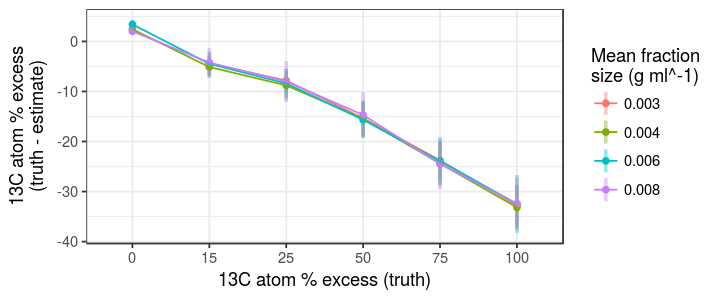

In [29]:
# difference between true and estimated

## q-SIP incorporators 
df.j.dis.qSIP = df.j %>%
    filter(atom_CI_low > 0) %>%     # just incorporators identified by q-SIP
    filter(HWHRSIP_incorp == TRUE) %>%    # just MW-HR-SIP incorporators 
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(percIncorp, frac_mu) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(percIncorp = percIncorp %>% reorder(percIncorp %>% as.numeric),
           frac_mu = frac_mu %>% reorder(frac_mu %>% as.numeric))
   
# plotting
options(repr.plot.width=6, repr.plot.height=2.5)
p_qSIP = ggplot(df.j.dis.qSIP, aes(percIncorp, mean_delta_excess, 
                      color=frac_mu, group=frac_mu,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    geom_line() +
    #facet_grid(true_incorporator ~ .) +
    scale_color_discrete('Mean fraction\nsize (g ml^-1)') +
    labs(x='13C atom % excess (truth)', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

p_qSIP

Warning message:
“Removed 1 rows containing missing values (geom_linerange).”

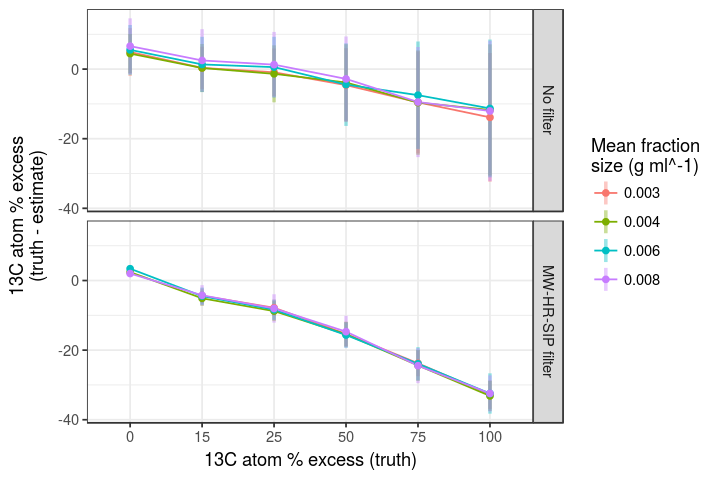

In [30]:
# difference between true and estimated
## q-SIP incorporators 
tmp1 = df.j %>%
    filter(atom_CI_low > 0) %>%     # just incorporators identified by q-SIP
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(percIncorp, frac_mu) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(percIncorp = percIncorp %>% reorder(percIncorp %>% as.numeric),
           frac_mu = frac_mu %>% reorder(frac_mu %>% as.numeric),
           incorp_called = 'No filter')
## MW-HR-SIP incorporators
tmp2 = df.j %>%
    filter(atom_CI_low > 0) %>%     # just incorporators identified by q-SIP
    filter(HWHRSIP_incorp == TRUE) %>%    # just MW-HR-SIP incorporators 
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(percIncorp, frac_mu) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(percIncorp = percIncorp %>% reorder(percIncorp %>% as.numeric),
           frac_mu = frac_mu %>% reorder(frac_mu %>% as.numeric),
           incorp_called = 'MW-HR-SIP filter')

# combining tables
df.j.dis.qSIP = rbind(tmp1, tmp2) %>%
    mutate(incorp_called = factor(incorp_called, levels=c('No filter', 'MW-HR-SIP filter')))

   
# plotting
options(repr.plot.width=6, repr.plot.height=4)
p_qSIP = ggplot(df.j.dis.qSIP, aes(percIncorp, mean_delta_excess, 
                      color=frac_mu, group=frac_mu,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_line() +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    facet_grid(incorp_called ~ .) +
    scale_color_discrete('Mean fraction\nsize (g ml^-1)') +
    labs(x='13C atom % excess (truth)', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

p_qSIP

## Delta-BD

In [31]:
dBD_files = list.files(path=workDir, pattern='*_dBD.txt', full.names=TRUE, recursive=TRUE)
dBD_files %>% length %>% print

[1] 240


In [32]:
df_dBD = list()
for(F in dBD_files){
    tmp = read.delim(F, sep='\t') 
    FF = strsplit(F, '/') %>% unlist
    FFl = length(FF)
    tmp$percIncorp = FF[FFl-3]
    tmp$frac_mu = FF[FFl-2]
    tmp$rep = FF[FFl-1]
    tmp$file = FF[FFl]
    df_dBD[[F]] = tmp
}

df_dBD = do.call(rbind, df_dBD)
rownames(df_dBD) = 1:nrow(df_dBD)
df_dBD %>% head(n=3) %>% print

                                 taxon mean_CM_control mean_CM_treatment
1       Acaryochloris_marina_MBIC11017        1.716308          1.717000
2 Acetobacter_pasteurianus_IFO_3283-03        1.725560          1.718431
3       Acetobacterium_woodii_DSM_1030        1.709902          1.711889
  stdev_CM_control stdev_CM_treatment      delta_BD percIncorp frac_mu rep
1     0.0053270980        0.002163313  0.0006922526          0   0.003   1
2     0.0044030676        0.003998680 -0.0071298129          0   0.003   1
3     0.0004085352        0.002156095  0.0019871258          0   0.003   1
                        file
1 OTU_abs1e9_PCR_sub_dBD.txt
2 OTU_abs1e9_PCR_sub_dBD.txt
3 OTU_abs1e9_PCR_sub_dBD.txt


### Joining estimate with truth

In [33]:
df.j = inner_join(df_dBD, df_shift, c('taxon' = 'taxon',
                                       'percIncorp'='percIncorp',
                                       'frac_mu'='frac_mu',
                                       'rep'='rep')) %>%
    filter(!is.na(delta_BD)) %>%
    mutate(true_incorporator = ifelse(median_true_BD_shift > 0.002, TRUE, FALSE),
           true_atom_fraction_excess = median_true_BD_shift / 0.036,
           atom_fraction_excess = delta_BD / 0.036)
df.j %>% head(n=3)

Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”

,taxon,mean_CM_control,mean_CM_treatment,stdev_CM_control,stdev_CM_treatment,delta_BD,percIncorp,frac_mu,rep,file,median_true_BD_shift,true_incorporator,true_atom_fraction_excess,atom_fraction_excess
1,Acaryochloris_marina_MBIC11017,1.71630762057,1.71699987315,0.00532709797458,0.00216331329233,0.000692252585824,0,0.003,1,OTU_abs1e9_PCR_sub_dBD.txt,1.68753899743e-14,FALSE,4.68760832619444e-13,0.0192292384951111
2,Acetobacter_pasteurianus_IFO_3283-03,1.72556044328,1.71843063039,0.00440306760775,0.00399868014329,-0.00712981289086,0,0.003,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.198050358079444
3,Acetobacterium_woodii_DSM_1030,1.7099020514,1.7118891772,0.000408535227958,0.00215609499879,0.00198712580106,0,0.003,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,0.0551979389183333


### Joining with MR-HR-SIP

In [34]:
df.j = left_join(df.j, df_incorp, c('taxon' = 'taxon',
                                    'percIncorp'='percIncorp',
                                    'frac_mu'='frac_mu',
                                    'rep'='rep')) %>%
    mutate(HWHRSIP_incorp = ifelse(is.na(HWHRSIP_incorp), FALSE, TRUE))

df.j %>% nrow %>% print
df.j %>% head(n=3)

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

[1] 264480


,taxon,mean_CM_control,mean_CM_treatment,stdev_CM_control,stdev_CM_treatment,delta_BD,percIncorp,frac_mu,rep,file,median_true_BD_shift,true_incorporator,true_atom_fraction_excess,atom_fraction_excess,HWHRSIP_incorp
1,Acaryochloris_marina_MBIC11017,1.71630762057,1.71699987315,0.00532709797458,0.00216331329233,0.000692252585824,0,0.003,1,OTU_abs1e9_PCR_sub_dBD.txt,1.68753899743e-14,FALSE,4.68760832619444e-13,0.0192292384951111,FALSE
2,Acetobacter_pasteurianus_IFO_3283-03,1.72556044328,1.71843063039,0.00440306760775,0.00399868014329,-0.00712981289086,0,0.003,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,-0.198050358079444,FALSE
3,Acetobacterium_woodii_DSM_1030,1.7099020514,1.7118891772,0.000408535227958,0.00215609499879,0.00198712580106,0,0.003,1,OTU_abs1e9_PCR_sub_dBD.txt,0,FALSE,0,0.0551979389183333,FALSE


### Plotting results

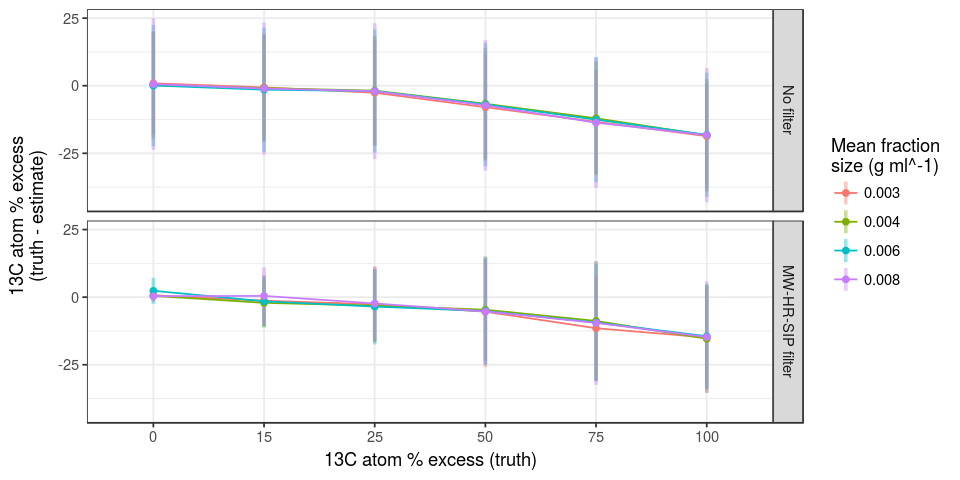

In [35]:
# difference between true and estimated
tmp1 = df.j %>%
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(percIncorp, frac_mu) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(percIncorp = percIncorp %>% reorder(percIncorp %>% as.numeric),
           frac_mu = frac_mu %>% reorder(frac_mu %>% as.numeric),
           incorp_called = 'No filter')

tmp2 = df.j %>%
    filter(HWHRSIP_incorp == TRUE) %>%    # just MW-HR-SIP incorporators 
    mutate(delta_excess = atom_fraction_excess * 100 - true_atom_fraction_excess * 100) %>%
    group_by(percIncorp, frac_mu) %>%
    summarize(mean_delta_excess = mean(delta_excess),
              sd_delta_excess = sd(delta_excess)) %>%
    ungroup() %>%
    mutate(percIncorp = percIncorp %>% reorder(percIncorp %>% as.numeric),
           frac_mu = frac_mu %>% reorder(frac_mu %>% as.numeric),
           incorp_called = 'MW-HR-SIP filter')

   
# combining tables
df.j.dis.dBD = rbind(tmp1, tmp2) %>%
    mutate(incorp_called = factor(incorp_called, levels=c('No filter', 'MW-HR-SIP filter')))


# plotting
options(repr.plot.width=8, repr.plot.height=4)
p_dBD = ggplot(df.j.dis.dBD, aes(percIncorp, mean_delta_excess, 
                      color=frac_mu, group=frac_mu,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_line() +
    geom_linerange(alpha=0.4, size=1) +    
    geom_point() +
    facet_grid(incorp_called ~ .) +
    scale_color_discrete('Mean fraction\nsize (g ml^-1)') +
    labs(x='13C atom % excess (truth)', 
         y='13C atom % excess\n(truth - estimate)') +
    theme_bw() 

p_dBD 

## Combined plot

Warning message:
“Removed 1 rows containing missing values (geom_linerange).”

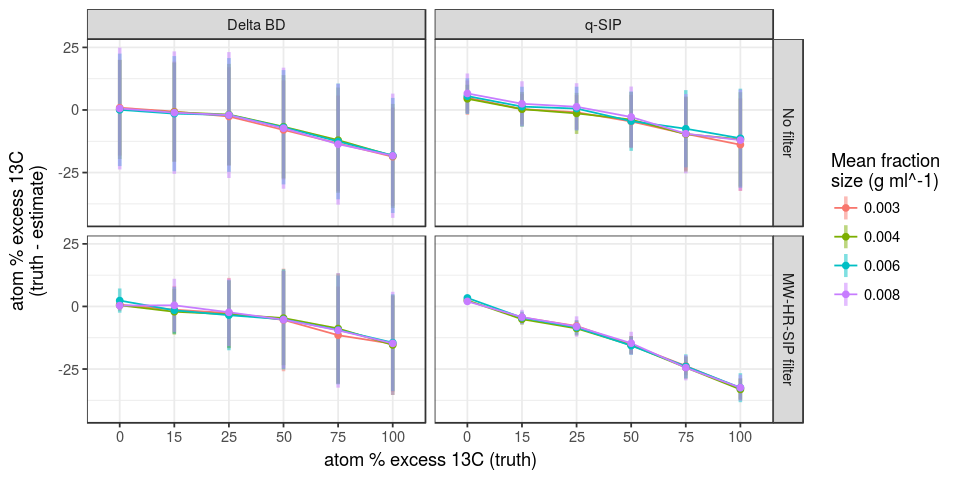

In [36]:
df.jj = rbind(df.j.dis.qSIP %>% mutate(method='qSIP'),
              df.j.dis.dBD %>% mutate(method='Delta BD')) %>%
    mutate(method = gsub('qSIP', 'q-SIP', method))


p.comb = ggplot(df.jj, aes(percIncorp, mean_delta_excess, 
                      color=frac_mu, group=frac_mu,
                      ymin=mean_delta_excess-sd_delta_excess,
                     ymax=mean_delta_excess+sd_delta_excess)) +
    geom_line() +
    geom_linerange(alpha=0.5, size=1) +
    geom_point() +
    scale_color_discrete('Mean fraction\nsize (g ml^-1)') +
    labs(x='atom % excess 13C (truth)', 
         y='atom % excess 13C\n(truth - estimate)') +
    facet_grid(incorp_called ~ method) +
    theme_bw() 
p.comb

In [37]:
outF = file.path(workDir, 'atomIncorp_fracSize_BDshift.pdf')
ggsave(outF, p.comb, width=8, height=4)
cat('File written:', outF, '\n')

Warning message:
“Removed 1 rows containing missing values (geom_linerange).”

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//atomIncorp_fracSize_BDshift.pdf 


In [38]:
outF = file.path(workDir, 'atomIncorp_fracSize_BDshift.jpeg')
ggsave(outF, p.comb, width=8, height=4)
cat('File written:', outF, '\n')

Warning message:
“Removed 1 rows containing missing values (geom_linerange).”

File written: /ebio/abt3_projects/methanogen_host_evo/SIPSim_pt2/data/bac_genome1147/atomIncorp_fracSize//atomIncorp_fracSize_BDshift.jpeg 
